<a href="https://colab.research.google.com/github/cnguyen75/Data-Science-Projects/blob/master/AP_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn import tree
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score



In [ ]:
policies_df = pd.read_csv('https://github.com/phebo/covid-19projections/blob/master/input/oxford-policy.csv?raw=true')

#for x in range (1, 10):
#  indexDates = policies_df[policies_df['date'] == '2020-01-0' + str(x)].index
#  policies_df.drop(indexDates, inplace=True)
#for x in range (10, 22):
#  indexDates = policies_df[policies_df['date'] == '2020-01-' + str(x)].index
#  policies_df.drop(indexDates, inplace=True)


policies_df.iloc[8120:8123]


,geo,geoCode,date,polCode,polName,level,flag
8120,Spain,ESP,2020-05-04,C2,Workplace closing,3,0.0
8121,Spain,ESP,2020-05-22,C2,Workplace closing,2,0.0
8122,Spain,ESP,2020-06-08,C2,Workplace closing,1,0.0


In [ ]:
deaths_df = pd.read_csv('https://github.com/phebo/covid-19projections/blob/master/input/econ-database.csv?raw=true')
deaths_df['excess deaths'] = deaths_df['deathTot'] - deaths_df['deathExp']
#i added excess deaths cause i think that is the more useful measure
deaths_df.sort_values(by = 'excess deaths', ascending = False).head(10)

,geo,date,deathTot,deathExp,excess deaths
464,Mexico,2020-07-19,27338,13032.000000,14306.000000
463,Mexico,2020-07-12,25829,12950.000000,12879.000000
465,Mexico,2020-07-26,26123,13319.000000,12804.000000
161,United Kingdom,2020-04-12,24691,11970.701277,12720.298723
162,United Kingdom,2020-04-19,24303,11955.901277,12347.098723
462,Mexico,2020-07-05,24684,12643.000000,12041.000000
459,Mexico,2020-06-14,24240,12583.000000,11657.000000
701,Spain,2020-03-29,19358,7859.000000,11499.000000
461,Mexico,2020-06-28,23879,12766.000000,11113.000000
466,Mexico,2020-08-02,24182,13075.000000,11107.000000


In [ ]:
population_df = pd.read_csv('https://github.com/phebo/covid-19projections/blob/master/input/econ-population.csv?raw=true')
population_df.head()

,geo,population
0,Austria,8902600
1,Belgium,11431406
2,Brazil,210147125
3,United Kingdom,66435550
4,Chile,17574003


In [ ]:
cum_df = pd.read_csv('https://github.com/phebo/covid-19projections/blob/master/input/jh-database.csv?raw=true')
df = cum_df.sort_values(by = 'geo', ascending = True)


df.iloc[10333:10338]

,geo,var,date,cum
10043,Barbados,case,2020-05-04,82
10044,Barbados,case,2020-05-05,82
10045,Barbados,case,2020-05-06,82
10046,Barbados,case,2020-05-07,82
10038,Barbados,case,2020-04-29,80


In [ ]:
cum_case_df = cum_df[cum_df['var'] == 'case']
cum_death_df = cum_df[cum_df['var'] == 'death']



In [ ]:
averageDeaths = []
errorDeathsCountries = []


for x in range (0, len(policies_df.index) - 1):
  policy1 = policies_df.iloc[x]
  policy2 = policies_df.iloc[x+1]
  date1 = policy1["date"]
  date2 = policy2['date']
  if policy1["geo"] != policy2["geo"] or policy1["polCode"] != policy2["polCode"]:
      date2 = '2021-01-10'
  country = cum_death_df[cum_death_df['geo'] == policy1['geo']]
  death1 = country[country['date'] == date1]
  death2 = country[country['date'] == date2]

  if not death1.empty:
    if death1['cum'].iloc[0] <= death2['cum'].iloc[0]:
      totalDeaths = death2['cum'].iloc[0] - death1['cum'].iloc[0]
      days = death2.index.tolist()[0] - death1.index.tolist()[0]
      average = totalDeaths/days
      print(totalDeaths)
      print("days: " + str(days))
      averageDeaths.append(average)
    else:
      errorDeathsCountries.append(x)
  else:
    errorDeathsCountries.append(x)
errorDeathsCountries.append(len(policies_df.index) - 1)

Streaming output truncated to the last 5000 lines.
16025
days: 124
96
days: 209
205
days: 87
0
days: 42
0
days: 72
9
days: 24
292
days: 153
133
days: 236
168
days: 62
133
days: 224
168
days: 62
0
days: 62
2
days: 62
69
days: 61
26
days: 23
36
days: 21
168
days: 62
0
days: 49
0
days: 25
133
days: 150
91
days: 35
77
days: 27
0
days: 12
0
days: 57
0
days: 9
0
days: 8
9
days: 59
88
days: 70
89
days: 36
38
days: 20
77
days: 27
0
days: 45
0
days: 92
0
days: 18
63
days: 72
238
days: 112
301
days: 347
301
days: 334
9
days: 138
46
days: 34
16
days: 13
13
days: 10
217
days: 96
55
days: 130
16
days: 13
115
days: 59
115
days: 47
2654
days: 173
17778
days: 129
209
days: 2
1020
days: 97
740
days: 42
18670
days: 158
209
days: 2
588
days: 71
434
days: 31
711
days: 40
18699
days: 160
209
days: 2
2
days: 5
722
days: 76
298
days: 21
711
days: 40
7871
days: 104
10828
days: 56
209
days: 2
586
days: 65
434
days: 31
740
days: 42
18879
days: 160
20640
days: 300
724
days: 81
19917
days: 223
910
days: 91
1588
d

In [ ]:
averageCases = []
errorCasesCountries = []

for x in range (0, len(policies_df.index) - 1):
  policy1 = policies_df.iloc[x]
  policy2 = policies_df.iloc[x+1] #why are we only checking consecutive rows? oh i guess the data is already arranged by country then by policy and how it changes over time for that policy
  date1 = policy1["date"]
  date2 = policy2['date']
  if policy1["geo"] != policy2["geo"] or policy1["polCode"] != policy2["polCode"]: #if not the same location or policy
      date2 = '2021-01-10' #last date
  country = cum_case_df[cum_case_df['geo'] == policy1['geo']] #gets the deaths of the particular country
  case1 = country[country['date'] == date1] #gets the deaths of the particular country on the date of the policy
  case2 = country[country['date'] == date2] #cum deaths on second date

  #these variable names are terrible btw
  if not case1.empty:
    if case1['cum'].iloc[0] <= case2['cum'].iloc[0]:
      totalCases = case2['cum'].iloc[0] - case1['cum'].iloc[0]
      days = case2.index.tolist()[0] - case1.index.tolist()[0]
      average = totalCases/days
      print(totalCases)
      print("days: " + str(days))
      averageCases.append(average) #why are you appending to a list? just create a new dataframe and fill it in
      '''
      if average < 0: #how can the average total deaths be negative?
        print(totalDeaths)
        print("days: " + str(days))
        average = 0
      '''
    else:
      errorCasesCountries.append(x)
  else:
    errorCasesCountries.append(x)
errorCasesCountries.append(len(policies_df.index) - 1)

Streaming output truncated to the last 5000 lines.
2326256
days: 338
2239950
days: 266
113138
days: 93
2042986
days: 124
10117
days: 209
27625
days: 87
86
days: 42
956
days: 72
241
days: 24
36445
days: 153
14574
days: 236
23168
days: 62
14541
days: 224
23168
days: 62
239
days: 62
875
days: 62
6236
days: 61
3327
days: 23
3883
days: 21
23168
days: 62
215
days: 49
438
days: 25
13888
days: 150
13192
days: 35
9976
days: 27
33
days: 12
220
days: 57
269
days: 9
164
days: 8
611
days: 59
9394
days: 70
7715
days: 36
9360
days: 20
9976
days: 27
1
days: 45
773
days: 92
232
days: 18
5281
days: 72
31455
days: 112
37742
days: 347
37742
days: 334
1283
days: 138
3502
days: 34
2565
days: 13
1718
days: 10
28660
days: 96
4699
days: 130
2565
days: 13
11042
days: 59
19336
days: 47
126278
days: 173
1013521
days: 129
10465
days: 2
38042
days: 97
36725
days: 42
1065019
days: 158
10465
days: 2
20147
days: 71
17908
days: 31
34553
days: 40
1067191
days: 160
10465
days: 2
13
days: 5
24548
days: 76
13494
days: 21
3

In [ ]:
new_policies_cases_df = policies_df.drop(index=errorCasesCountries)
new_policies_deaths_df = policies_df.drop(index=errorDeathsCountries)
new_policies_deaths_df['avg_deaths'] = averageDeaths
new_policies_cases_df['avg_cases'] = averageCases
df = new_policies_cases_df.copy()
deaths = new_policies_deaths_df['avg_deaths']
df['avg_deaths'] = deaths
#new_policies_cases_df.head()

#df = new_policies_deaths_df.sort_values(by='avg_deaths', ascending=False)
#df.head()

le = preprocessing.LabelEncoder()
new_policies_deaths_df['polCode'] = le.fit_transform(new_policies_deaths_df['polCode'])
new_policies_cases_df['polCode'] = le.fit_transform(new_policies_cases_df['polCode'])

new_policies_deaths_df['polCode']
#df = policies_df.sort_values(by = 'polCode', ascending=False)

#df.head(10)
print(new_policies_cases_df['avg_cases'].max())

81441.17021276595


<Figure size 432x288 with 0 Axes>

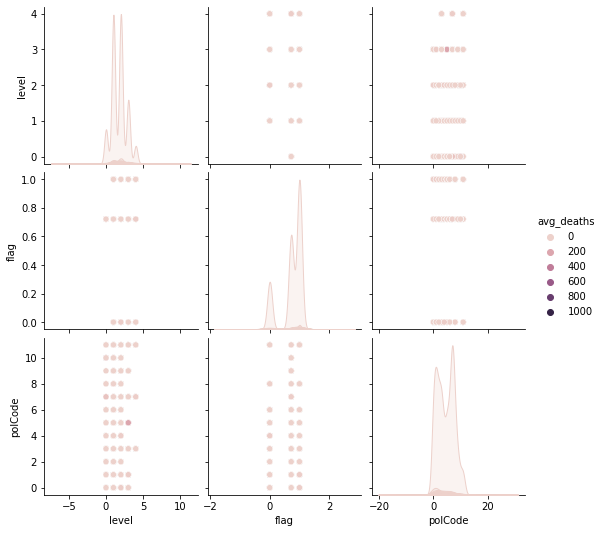

In [ ]:
plt.figure()
#new_policies_deaths_df['polCode'] = le.fit_transform(new_policies_df['polCode'])
new_policies_deaths_df['flag'] = new_policies_deaths_df['flag'].fillna(new_policies_deaths_df['flag'].mean())
new_policies_cases_df['flag'] = new_policies_cases_df['flag'].fillna(new_policies_cases_df['flag'].mean())


sns.pairplot(new_policies_deaths_df, vars=['level', 'flag', 'polCode'], hue = "avg_deaths")
#plt.show()



In [ ]:
feature_names = ['polCode', 'level', 'flag']
x = new_policies_deaths_df[feature_names].values
y2 = new_policies_deaths_df['avg_deaths'].values
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.2, random_state=42)

clf2 = tree.DecisionTreeRegressor(random_state=0)

clf2.fit(x2_train, y2_train)
y2_pred = clf2.predict(x2_test)


dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)


In [ ]:
df = pd.DataFrame(columns=['polCode', 'level', 'flag', 'predicted_death'])

for a in range(0, 12):
  for b in range(1, 5):
    for c in range(0, 2):
      a = a * 1.0
      b = b * 1.0
      c = c * 1.0
      prediction = clf2.predict([[a, b, c]])
      df.loc[len(df.index)] = [a, b, c, prediction[0]]
#df.head()
#print(mean_squared_error(y2_pred, y2_test, squared=False))
#print('R Squared Score is:', r2_score(y2_test, y2_pred))
df.sort_values(by='predicted_death', ascending=True).iloc[8:15]


,polCode,level,flag,predicted_death
17,2.0,1.0,1.0,11.222949
29,3.0,3.0,1.0,11.667497
25,3.0,1.0,1.0,11.781809
37,4.0,3.0,1.0,13.348008
35,4.0,2.0,1.0,13.348008
59,7.0,2.0,1.0,14.994396
16,2.0,1.0,0.0,16.024659


20706
6902


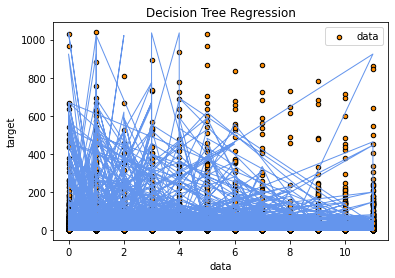

In [ ]:
# Plot the results
print(x2_train.size)
print(len(x2_train))

plt.figure()
plt.scatter(x2_train[:,0], y2_train, s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(x2_test, y2_test, color="cornflowerblue", linewidth=1)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()


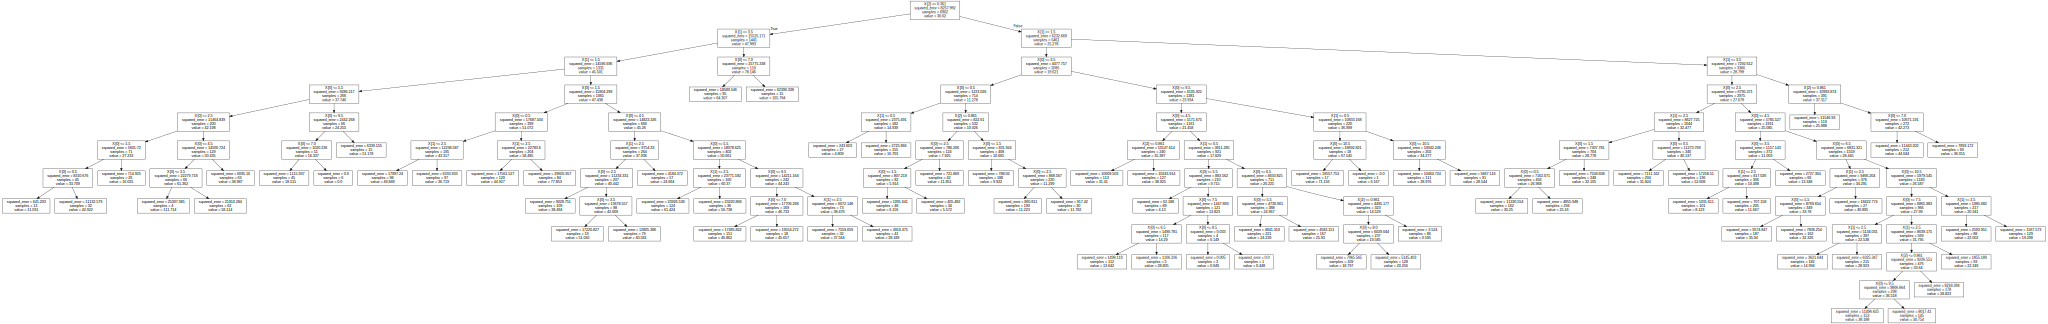

In [ ]:
graph

In [ ]:
print(mean_squared_error(y2_pred, y2_test, squared=False))
print('R Squared Score is:', r2_score(y2_test, y2_pred))

90.36251428792197
R Squared Score is: 0.005701433023019065


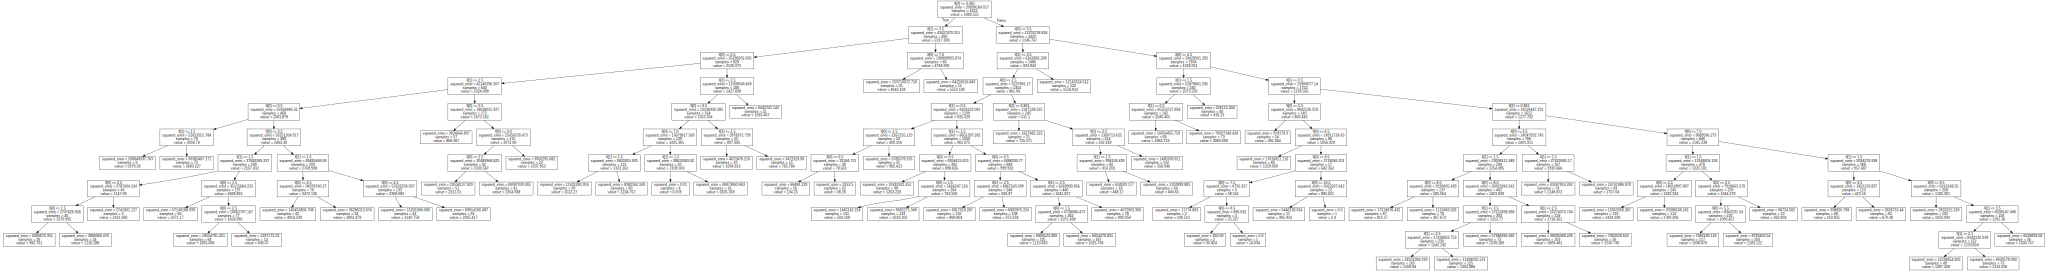

In [ ]:
feature_names = ['polCode', 'level', 'flag']
x = new_policies_cases_df[feature_names].values
y2 = new_policies_cases_df['avg_cases'].values
x2_train, x2_test, y2_train, y2_test = train_test_split(x, y2, test_size=0.5, random_state=42)

clf2 = tree.DecisionTreeRegressor(random_state=0)

clf2.fit(x2_train, y2_train)
y2_pred = clf2.predict(x2_test)

dot_data = tree.export_graphviz(clf2, out_file=None)
graph = graphviz.Source(dot_data)
graph


In [ ]:
print(mean_squared_error(y2_pred, y2_test, squared=False))

4660.973721127208


In [ ]:
df = pd.DataFrame(columns=['polCode', 'level', 'flag', 'predicted_case'])

for a in range(0, 12):
  for b in range(1, 5):
    for c in range(0, 2):
      a = a * 1.0
      b = b * 1.0
      c = c * 1.0
      prediction = clf2.predict([[a, b, c]])
      df.loc[len(df.index)] = [a, b, c, prediction[0]]
df.sort_values(by='predicted_case', ascending=True).iloc[3:10]
#print('R Squared Score is:', r2_score(y2_test, y2_pred))

,polCode,level,flag,predicted_case
73,9.0,1.0,1.0,103.835286
47,5.0,4.0,1.0,262.804427
61,7.0,3.0,1.0,262.804427
63,7.0,4.0,1.0,262.804427
45,5.0,3.0,1.0,262.804427
55,6.0,4.0,1.0,262.804427
53,6.0,3.0,1.0,262.804427
